# Temporal-Difference Methods

In this notebook, you will write your own implementations of many Temporal-Difference (TD) methods.

While we have provided some starter code, you are welcome to erase these hints and write your code from scratch.

---

### Part 0: Explore CliffWalkingEnv

We begin by importing the necessary packages.

In [29]:
import sys
import gym
import numpy as np
from collections import defaultdict, deque
import matplotlib.pyplot as plt
%matplotlib inline

import check_test
from plot_utils import plot_values

Use the code cell below to create an instance of the [CliffWalking](https://github.com/openai/gym/blob/master/gym/envs/toy_text/cliffwalking.py) environment.

In [30]:
env = gym.make('CliffWalking-v0')

The agent moves through a $4\times 12$ gridworld, with states numbered as follows:
```
[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
 [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
 [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
 [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]]
```
At the start of any episode, state `36` is the initial state.  State `47` is the only terminal state, and the cliff corresponds to states `37` through `46`.

The agent has 4 potential actions:
```
UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3
```

Thus, $\mathcal{S}^+=\{0, 1, \ldots, 47\}$, and $\mathcal{A} =\{0, 1, 2, 3\}$.  Verify this by running the code cell below.

In [31]:
print(env.action_space)
print(env.observation_space)

Discrete(4)
Discrete(48)


In this mini-project, we will build towards finding the optimal policy for the CliffWalking environment.  The optimal state-value function is visualized below.  Please take the time now to make sure that you understand _why_ this is the optimal state-value function.

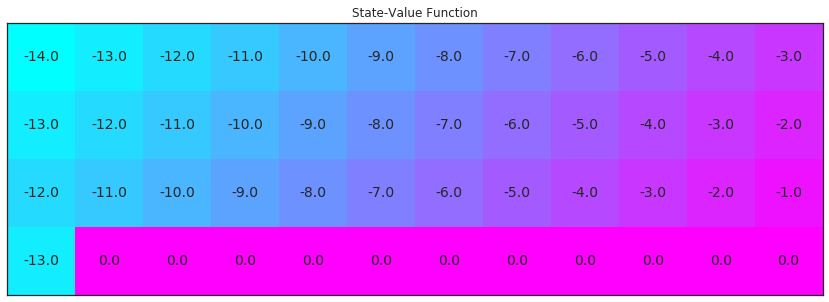

In [32]:
# define the optimal state-value function
V_opt = np.zeros((4,12))
V_opt[0:13][0] = -np.arange(3, 15)[::-1]
V_opt[0:13][1] = -np.arange(3, 15)[::-1] + 1
V_opt[0:13][2] = -np.arange(3, 15)[::-1] + 2
V_opt[3][0] = -13

plot_values(V_opt)

### Part 1: TD Control: Sarsa

In this section, you will write your own implementation of the Sarsa control algorithm.

Your algorithm has four arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `alpha`: This is the step-size parameter for the update step.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as output:
- `Q`: This is a dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

Please complete the function in the code cell below.

(_Feel free to define additional functions to help you to organize your code._)

In [33]:
def epsilon_greedy(Q, state, nA, eps):
    
    if random.random() > eps:
        q_s = Q[state]
        action = np.argmax(q_s)
    else:
        action = random.randint(0, nA-1)
        
    return action

In [34]:
def update_Q_sarsa(Q, alpha, gamma, state, action, reward, next_state=None, next_action=None):
    
    q_s_a = Q[state][action]
    next_q_s_a = Q[next_state][next_action] if next_state is not None else 0  
    
    return q_s_a + alpha * (reward + gamma*next_q_s_a - q_s_a)

In [35]:
def plot_performance(num_episodes, avg_score, plot_every):
    
    plt.plot(np.linspace(0, num_episodes, len(avg_score), endpoint=False), np.asarray(avg_score))
    plt.xlabel('Episode Number')
    plt.ylabel('Average Reward (Over Next {} Episodes)'.format(plot_every))
    plt.show()

    print(('Best Average Reward over %d Episodes: ' % plot_every), np.max(avg_score)) 
    
    return

In [36]:
import random
def sarsa(env, num_episodes, alpha, gamma=1.0, plot_every=100):
    # initialize action-value function (empty dictionary of arrays)
    nA = env.action_space.n
    Q = defaultdict(lambda: np.zeros(env.nA))
    
    # initialize performance monitor
    temp_score = deque(maxlen=plot_every)  
    avg_score = deque(maxlen=num_episodes) 
    
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()   
        
        score = 0       
        state = env.reset()  # restart environment
        
        eps = 1.0/i_episode
        action = epsilon_greedy(Q, state, nA, eps)
        
        while True:
            next_state, reward, done, info = env.step(action)
            score += reward
            
            if not done:
                next_action = epsilon_greedy(Q, next_state, nA, eps)
                Q[state][action] = update_Q_sarsa(Q, alpha, gamma, state, action, reward, next_state, next_action)
                state = next_state
                action = next_action
            else:
                Q[state][action] = update_Q_sarsa(Q, alpha, gamma, state, action, reward)
                temp_score.append(score)   # update episode 
                break
        if i_episode % plot_every == 0:
            avg_score.append(np.mean(temp_score))
    
    # Plot performance
    plot_performance(num_episodes, avg_score, plot_every)
        
    return Q

Use the next code cell to visualize the **_estimated_** optimal policy and the corresponding state-value function.  

If the code cell returns **PASSED**, then you have implemented the function correctly!  Feel free to change the `num_episodes` and `alpha` parameters that are supplied to the function.  However, if you'd like to ensure the accuracy of the unit test, please do not change the value of `gamma` from the default.

Episode 5000/5000

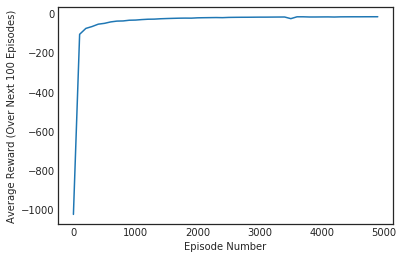

Best Average Reward over 100 Episodes:  -15.56


**<span style="color: red;">PLEASE TRY AGAIN</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 1  2  1  1  1  1  1  2  2  1  1  1]
 [ 1  1  2  1  1  1  1  1  1  2  1  2]
 [ 0  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


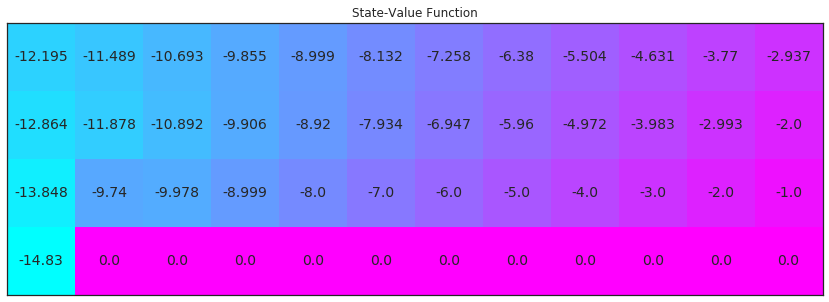

In [37]:
# obtain the estimated optimal policy and corresponding action-value function
Q_sarsa = sarsa(env, 5000, .01)

# print the estimated optimal policy
policy_sarsa = np.array([np.argmax(Q_sarsa[key]) if key in Q_sarsa else -1 for key in np.arange(48)]).reshape(4,12)
check_test.run_check('td_control_check', policy_sarsa)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_sarsa)

# plot the estimated optimal state-value function
V_sarsa = ([np.max(Q_sarsa[key]) if key in Q_sarsa else 0 for key in np.arange(48)])
plot_values(V_sarsa)

### Part 2: TD Control: Q-learning

In this section, you will write your own implementation of the Q-learning control algorithm.

Your algorithm has four arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `alpha`: This is the step-size parameter for the update step.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as output:
- `Q`: This is a dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

Please complete the function in the code cell below.

(_Feel free to define additional functions to help you to organize your code._)

In [38]:
def update_q_learning(Q, alpha, gamma, state, action, reward, next_state=None):
    q_s_a = Q[state][action]
    next_q_s_max = np.max(Q[next_state]) if next_state is not None else 0  
    return q_s_a + alpha * (reward + gamma*next_q_s_max - q_s_a)

In [39]:
def q_learning(env, num_episodes, alpha, gamma=1.0, plot_every=100):
    # initialize empty dictionary of arrays
    nA = env.action_space.n
    Q = defaultdict(lambda: np.zeros(env.nA))
    
    # initialize performance monitor
    temp_score = deque(maxlen=plot_every)  
    avg_score = deque(maxlen=num_episodes) 
    
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        
        score = 0       
        state = env.reset()  # restart environment
        
        eps = 1.0/i_episode
            
        while True:
            action = epsilon_greedy(Q, state, nA, eps)
            next_state, reward, done, info = env.step(action)
            score += reward
            
            if not done:
                Q[state][action] = update_q_learning(Q, alpha, gamma, state, action, reward, next_state)
                state = next_state
            else:
                Q[state][action] = update_Q_sarsa(Q, alpha, gamma, state, action, reward)
                temp_score.append(score)   # update episode
                break
        if i_episode % plot_every == 0:
            avg_score.append(np.mean(temp_score))
    
    # plot performance
    plot_performance(num_episodes, avg_score, plot_every)
        
    return Q

Use the next code cell to visualize the **_estimated_** optimal policy and the corresponding state-value function. 

If the code cell returns **PASSED**, then you have implemented the function correctly!  Feel free to change the `num_episodes` and `alpha` parameters that are supplied to the function.  However, if you'd like to ensure the accuracy of the unit test, please do not change the value of `gamma` from the default.

Episode 5000/5000

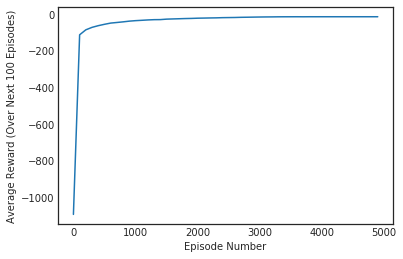

Best Average Reward over 100 Episodes:  -13.0


**<span style="color: green;">PASSED</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 3  1  0  1  3  0  1  3  0  1  1  2]
 [ 3  3  0  1  1  1  1  3  1  1  1  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


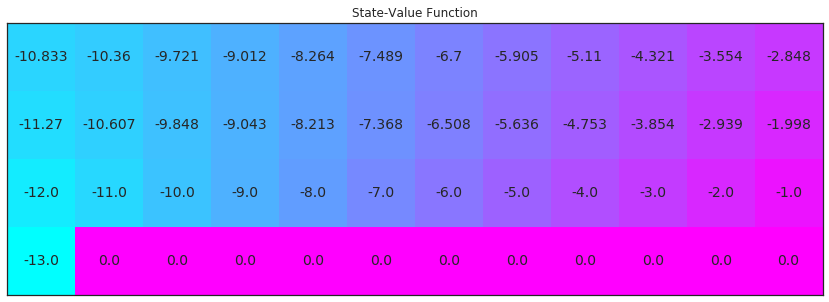

In [40]:
# obtain the estimated optimal policy and corresponding action-value function
Q_sarsamax = q_learning(env, 5000, .01)

# print the estimated optimal policy
policy_sarsamax = np.array([np.argmax(Q_sarsamax[key]) if key in Q_sarsamax else -1 for key in np.arange(48)]).reshape((4,12))
check_test.run_check('td_control_check', policy_sarsamax)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_sarsamax)

# plot the estimated optimal state-value function
plot_values([np.max(Q_sarsamax[key]) if key in Q_sarsamax else 0 for key in np.arange(48)])

### Part 3: TD Control: Expected Sarsa

In this section, you will write your own implementation of the Expected Sarsa control algorithm.

Your algorithm has four arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `alpha`: This is the step-size parameter for the update step.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as output:
- `Q`: This is a dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

Please complete the function in the code cell below.

(_Feel free to define additional functions to help you to organize your code._)

In [41]:
def update_expected_sarsa(Q, alpha, gamma, nA, eps, state, action, reward, next_state=None):
    
    q_s_a = Q[state][action]
    
    if next_state is None:
        next_q_s_expected = 0
        return q_s_a + alpha * (reward + gamma*next_q_s_expected - q_s_a)
    
    policy_n_s = np.ones(nA) * eps/nA
    policy_n_s[np.argmax(Q[next_state])] = 1 - eps + (eps/nA)    # greedy policy
    next_q_s_expected = np.dot(Q[next_state], policy_n_s)
    
    return q_s_a + alpha * (reward + gamma*next_q_s_expected - q_s_a)

In [42]:
def expected_sarsa(env, num_episodes, alpha, gamma=1.0, plot_every=100):
    # initialize empty dictionary of arrays
    nA = env.action_space.n
    Q = defaultdict(lambda: np.zeros(env.nA))
    
    # initialize performance monitor
    temp_score = deque(maxlen=plot_every)  
    avg_score = deque(maxlen=num_episodes) 
    
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        
        score = 0       
        state = env.reset()  # restart environment
        
        eps = 0.005
            
        while True:
            action = epsilon_greedy(Q, state, nA, eps)
            next_state, reward, done, info = env.step(action)
            score += reward
            
            if not done:
                Q[state][action] = update_expected_sarsa(Q, alpha, gamma, nA, eps, state, action, reward, next_state)
                state = next_state
            else:
                Q[state][action] = update_expected_sarsa(Q, alpha, gamma, nA, eps, state, action, reward)
                temp_score.append(score)   # update episode 
                break
        if i_episode % plot_every == 0:
            avg_score.append(np.mean(temp_score))

    
    # Plot performance
    plot_performance(num_episodes, avg_score, plot_every)
        
    return Q

Use the next code cell to visualize the **_estimated_** optimal policy and the corresponding state-value function.  

If the code cell returns **PASSED**, then you have implemented the function correctly!  Feel free to change the `num_episodes` and `alpha` parameters that are supplied to the function.  However, if you'd like to ensure the accuracy of the unit test, please do not change the value of `gamma` from the default.

Episode 10000/10000

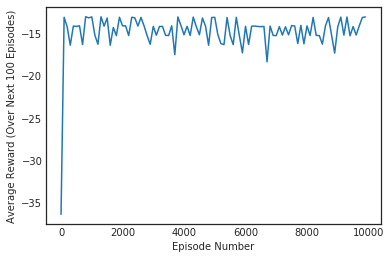

Best Average Reward over 100 Episodes:  -13.0


**<span style="color: green;">PASSED</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 1  1  1  2  1  0  1  1  1  2  1  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


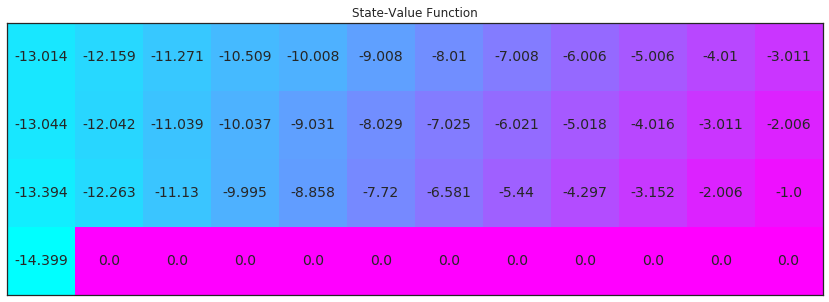

In [43]:
# obtain the estimated optimal policy and corresponding action-value function
Q_expsarsa = expected_sarsa(env, 10000, 1)

# print the estimated optimal policy
policy_expsarsa = np.array([np.argmax(Q_expsarsa[key]) if key in Q_expsarsa else -1 for key in np.arange(48)]).reshape(4,12)
check_test.run_check('td_control_check', policy_expsarsa)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_expsarsa)

# plot the estimated optimal state-value function
plot_values([np.max(Q_expsarsa[key]) if key in Q_expsarsa else 0 for key in np.arange(48)])